In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
data = pd.read_csv("real_estate_data_version_2.csv")
# Vérifier si 'Prix' est une chaîne, sinon convertir
if data['Prix'].dtype != 'object':
    data['Prix'] = data['Prix'].astype(str)

# Nettoyage de la colonne "Prix"
data['Prix'] = data['Prix'].str.replace(' ', '', regex=False)  # Supprimer les espaces
data['Prix'] = data['Prix'].str.replace('[^0-9.]', '', regex=True)  # Garder uniquement les chiffres et '.'

# Convertir en numérique (remplacer les erreurs par NaN)
data['Prix'] = pd.to_numeric(data['Prix'], errors='coerce')

# Convertir "Modifiée" en datetime
data['Modifiée'] = pd.to_datetime(data['Modifiée'], errors='coerce')

# Vérifier les résultats
print(data[['Région', 'Prix', 'Modifiée']].head())
print(f"Nombre de lignes avec 'Prix' manquant : {data['Prix'].isnull().sum()}")






            Région        Prix   Modifiée
0         Hammamet  15000000.0 2024-04-12
1    Cite Ennasr 2  13000000.0 2024-04-12
2    Le Kram Ouest       370.0 2024-04-12
3  Jardins d'el Me      1800.0 2024-04-12
4    Cite Ennasr 2       860.0 2024-04-12
Nombre de lignes avec 'Prix' manquant : 3


In [33]:
missing_prices = data['Prix'].isnull().sum()
total_rows = len(data)
print(f"Nombre total de lignes : {total_rows}")
print(f"Nombre de lignes avec un prix manquant : {missing_prices}")


Nombre total de lignes : 1250
Nombre de lignes avec un prix manquant : 3


In [34]:
# Garder uniquement les lignes où "Nature" est "Vente"
data = data[data["Nature"] == "Vente"]

# Vérifier les premières lignes du nouveau DataFrame
print(data.head())


             Région Nature         Type                  Texte annonce  \
0          Hammamet  Vente      Maisons           Villa a hammamet sud   
1     Cite Ennasr 2  Vente      Maisons           Villa avec piscine a   
18  Jardins de Cart  Vente  App. 3 pièc       Un appartement s3 vide m   
19       El Mourouj  Vente  App. 3 pièc             Appartement nawres   
24       El Mourouj  Vente  App. 4 pièc  Appartement mourouj 3 2 étage   

          Prix   Modifiée  
0   15000000.0 2024-04-12  
1   13000000.0 2024-04-12  
18    890000.0 2024-04-12  
19    107000.0 2024-04-12  
24    170000.0 2024-04-12  


In [36]:
data.to_csv("filtered_data.csv", index=False, encoding="utf-8")
print("Données filtrées sauvegardées dans 'filtered_data.csv'.")


Données filtrées sauvegardées dans 'filtered_data.csv'.


In [37]:
# Groupby et statistiques descriptives
grouped_data = data.groupby('Région').describe()
print("Statistiques descriptives par région :")
print(grouped_data)

# Flatten les données groupées pour une vue plus claire
unstacked = grouped_data.unstack()
print("Groupby avec unstack :")
print(unstacked)


Statistiques descriptives par région :
                 Prix                                                         \
                count       mean        min        25%        50%        75%   
Région                                                                         
Ain Zaghouan      8.0   504500.0   160000.0   424500.0   560000.0   640000.0   
Akouda            1.0  1550000.0  1550000.0  1550000.0  1550000.0  1550000.0   
Ariana            4.0   400750.0    90000.0   174000.0   381500.0   608250.0   
Arkou             1.0  1350000.0  1350000.0  1350000.0  1350000.0  1350000.0   
Bab Bhar          2.0   245000.0   240000.0   242500.0   245000.0   247500.0   
...               ...        ...        ...        ...        ...        ...   
Soliman           1.0   140000.0   140000.0   140000.0   140000.0   140000.0   
Zaghouan          2.0   475000.0   370000.0   422500.0   475000.0   527500.0   
Zaouiet Sousse    1.0   390000.0   390000.0   390000.0   390000.0   390000.0   
Z

In [38]:
# Vérifier les doublons
duplicates = data.duplicated()
print("Doublons détectés :")
print(data[duplicates])

# Supprimer les doublons
data = data.drop_duplicates()
print("Données après suppression des doublons :")
print(data.head())


Doublons détectés :
        Région Nature         Type                  Texte annonce      Prix  \
25  El Mourouj  Vente  App. 4 pièc  Appartement mourouj 3 2 étage  170000.0   

     Modifiée  
25 2024-04-12  
Données après suppression des doublons :
             Région Nature         Type                  Texte annonce  \
0          Hammamet  Vente      Maisons           Villa a hammamet sud   
1     Cite Ennasr 2  Vente      Maisons           Villa avec piscine a   
18  Jardins de Cart  Vente  App. 3 pièc       Un appartement s3 vide m   
19       El Mourouj  Vente  App. 3 pièc             Appartement nawres   
24       El Mourouj  Vente  App. 4 pièc  Appartement mourouj 3 2 étage   

          Prix   Modifiée  
0   15000000.0 2024-04-12  
1   13000000.0 2024-04-12  
18    890000.0 2024-04-12  
19    107000.0 2024-04-12  
24    170000.0 2024-04-12  


In [39]:
# Vérifier les valeurs manquantes
missing_data = data.isnull().sum()
print("Nombre de valeurs manquantes par colonne :")
print(missing_data)

# Remplir les valeurs manquantes avec une stratégie (par exemple, moyenne ou médiane)
data['Prix'] = data['Prix'].fillna(data['Prix'].median())
print("Données après traitement des valeurs manquantes :")
print(data.isnull().sum())


Nombre de valeurs manquantes par colonne :
Région           0
Nature           0
Type             0
Texte annonce    0
Prix             0
Modifiée         0
dtype: int64
Données après traitement des valeurs manquantes :
Région           0
Nature           0
Type             0
Texte annonce    0
Prix             0
Modifiée         0
dtype: int64


In [40]:
# Trier par prix croissant
data = data.sort_values(by='Prix', ascending=True)
print("Données triées par prix :")
print(data.head())

# Mélanger les données
data = data.sample(frac=1).reset_index(drop=True)
print("Données mélangées :")
print(data.head())


Données triées par prix :
           Région Nature         Type                  Texte annonce     Prix  \
998      Khelidia  Vente     Surfaces                 Local khelidia  55000.0   
250          Sfax  Vente  App. 3 pièc  Appart 60m2 avenue de algerie  60000.0   
519      Hammamet  Vente      Maisons       Av villa s5 avec piscine  65000.0   
624    Bab Menara  Vente        Autre       Fond de commerce d'un re  75000.0   
419  Sidi Bou Ali  Vente      Maisons               Maison a salmoun  75000.0   

      Modifiée  
998 2024-04-12  
250 2024-04-12  
519 2024-04-12  
624 2024-04-12  
419 2024-04-12  
Données mélangées :
            Région Nature         Type                  Texte annonce  \
0       El Mourouj  Vente  App. 3 pièc             Appartement nawres   
1    Cite Ennasr 2  Vente  App. 4 pièc        S3 avec jardin à ennasr   
2     Marsa Safsaf  Vente  App. 3 pièc  Réf 89v bel appartement s 2 r   
3       El Mourouj  Vente      Maisons                Villa mourouj 6   


Valeurs manquantes par colonne :
 Région           0
Nature           0
Type             0
Texte annonce    0
Prix             0
Modifiée         0
dtype: int64


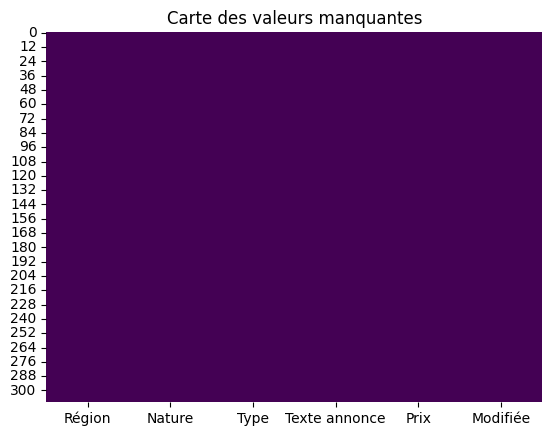

In [41]:
# Vérifier les valeurs manquantes
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

# Visualisation des valeurs manquantes
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Carte des valeurs manquantes")
plt.show()


In [42]:
# Discrétiser la colonne "Prix" en 4 catégories
data['Prix_Catégorie'] = pd.qcut(data['Prix'], q=4, labels=['Bas', 'Moyen-Bas', 'Moyen-Haut', 'Haut'])
print("Données discrétisées :")
print(data[['Prix', 'Prix_Catégorie']].head())


Données discrétisées :
        Prix Prix_Catégorie
0   107000.0            Bas
1   475000.0     Moyen-Haut
2  1500000.0           Haut
3   750000.0     Moyen-Haut
4  1170000.0           Haut


In [43]:
# Agrégation par région avec somme et moyenne
data['Somme_Prix'] = data.groupby('Région')['Prix'].transform('sum')
data['Moyenne_Prix'] = data.groupby('Région')['Prix'].transform('mean')
print("Données avec colonnes agrégées :")
print(data[['Région', 'Prix', 'Somme_Prix', 'Moyenne_Prix']].head())


Données avec colonnes agrégées :
            Région       Prix  Somme_Prix  Moyenne_Prix
0       El Mourouj   107000.0   4922000.0  2.734444e+05
1    Cite Ennasr 2   475000.0  18235000.0  2.605000e+06
2     Marsa Safsaf  1500000.0   6700000.0  2.233333e+06
3       El Mourouj   750000.0   4922000.0  2.734444e+05
4  Cite De La Plag  1170000.0   1170000.0  1.170000e+06
